<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/6_Regresi%C3%B3n_Lineal__Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("CREDICEL BNO.csv")
df.info()

C:\Users\andre\AppData\Local\Temp\ipykernel_29104\214320300.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("CREDICEL BNO.csv")


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 45474 entries, (nan, 'plazo', 'precio', 'enganche', 'descuento', 'semana', 'monto_financiado', 'costo_total', 'monto_accesorios', 'status', 'fraude', 'inversion', 'pagos_realizados', 'reautorizacion', 'puntos', 'porc_enganche', 'porc_tasa', 'score_buro', 'folio', 'tag', 'folio_solicitud', 'fecha', 'marca', 'modelo', 'agente_venta', 'dis_venta', 'empresa', 'fecha_ultimo_pago', 'fecha_pago_proximo', 'status_cuenta', 'riesgo', 'razones_buro', 'semana_actual', 'codigo_postal') to ('>>>>>>> e50850f5040f1bd66162ef45c0bf3d09743dd8c0', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan)
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   <<<<<<< HEAD  45472 non-null  object
dtypes: object(1)
memory usage: 9.1+ MB


In [5]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='enganche', y='precio', color="blue", data=df)
sns.scatterplot(x='semana', y='precio', color="green", data=df)

ValueError: Could not interpret value `enganche` for parameter `x`

<Axes: xlabel='pagos_realizados', ylabel='precio'>

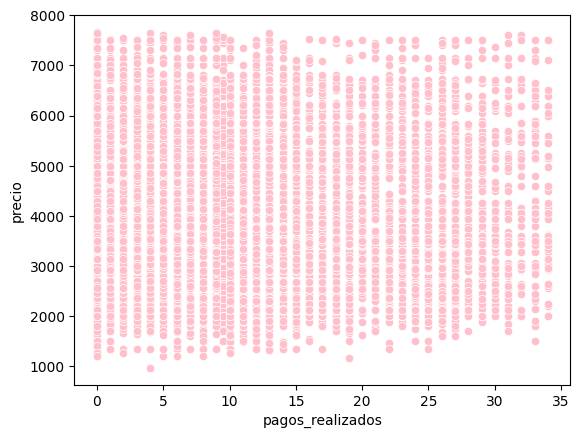

In [ ]:
sns.scatterplot(x='pagos_realizados', y='precio', color="pink", data=df)

<Axes: xlabel='costo_total', ylabel='precio'>

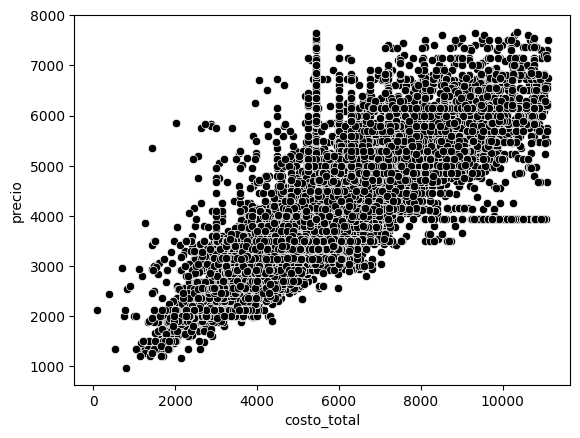

In [ ]:
sns.scatterplot(x='costo_total', y='precio', color="brown", data=df)

<Axes: xlabel='monto_financiado', ylabel='costo_total'>

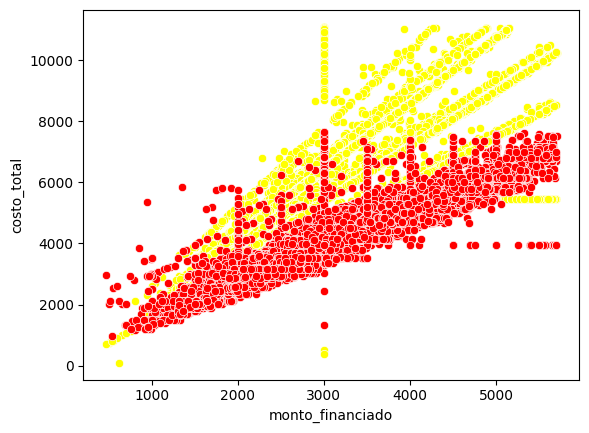

In [ ]:
sns.scatterplot(x='monto_financiado', y='costo_total', color="yellow", data=df)
sns.scatterplot(x='monto_financiado', y='precio', color="red", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= df[['enganche', 'semana',"pagos_realizados","costo_total","monto_financiado"]]
Var_Dep= df['precio']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['enganche', 'semana', 'pagos_realizados', 'costo_total',
        'monto_financiado'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([1.01457586, 1.6277612 , 0.45000848, 0.0737613 , 0.81042358]),
 'rank_': 5,
 'singular_': array([319929.65149332,  70183.30419791,  40688.21491291,   8658.9205889 ,
          1271.08397606]),
 'intercept_': -148.31374715058746}

**Modelo matemático: y= 2.0325063x + 5.857776154826299**

---




In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.886387370932019

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=df[['enganche', 'semana',"pagos_realizados","costo_total","monto_financiado"]])
y_pred

array([1877.63055056, 3078.50454461, 1979.07254626, ..., 4924.27571761,
       4194.1558495 , 5508.9935037 ])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)
df

,Predicciones,Unnamed: 0,plazo,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,...,dis_venta,empresa,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,riesgo,razones_buro,semana_actual,codigo_postal,riesgo_categorizado
0,1877.630551,0,26,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,...,mic0437,microtec,DESCONOCIDO,DESCONOCIDO,Atrasado,No Hay Datos,0.00,0.0,0.00,Hay riesgo
1,3078.504545,1,13,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,...,mic015,microtec,DESCONOCIDO,DESCONOCIDO,Atrasado,No Hay Datos,0.00,0.0,0.00,Hay riesgo
2,1979.072546,2,13,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,...,mic0437,microtec,DESCONOCIDO,DESCONOCIDO,Mora,0.0,0.00,0.0,0,Hay riesgo
3,1979.072546,3,13,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,...,mic0748,microtec,DESCONOCIDO,DESCONOCIDO,Atrasado,No Hay Datos,0.00,0.0,0.00,Hay riesgo
4,4356.953383,4,39,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,...,mic0437,microtec,05/03/2022 00:00,12/03/2022 00:00,Mora,0.0,0,0.0,74.00,Hay riesgo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3374.540168,22730,26,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,...,svc044,servicel,18/04/2023 18:45,25/04/2023 00:00,Corriente,10.0,0.00,"K0,J0,D8,E2",0.00,Riesgo considerable
22731,4130.354053,22731,26,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,...,PXC004,pixelulares,18/04/2023 18:46,25/04/2023 00:00,Corriente,9.0,0.00,"K0,J0,D8,E2",0.00,Riesgo considerable
22732,4924.275718,22732,26,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,...,gph008,microtec,18/04/2023 18:47,25/04/2023 00:00,Corriente,11.0,0.00,"K0,D7,F7,D8",0.00,Riesgo considerable
22733,4194.155850,22733,39,3935.5,866.9,0.0,386.0,3001.8,5448.5,0.0,...,gph014,grupoph,18/04/2023 18:49,25/04/2023 00:00,Corriente,14.0,0.00,"J0,G1,E0,E2",0.00,Riesgo considerable


<Axes: xlabel='monto_financiado', ylabel='precio'>

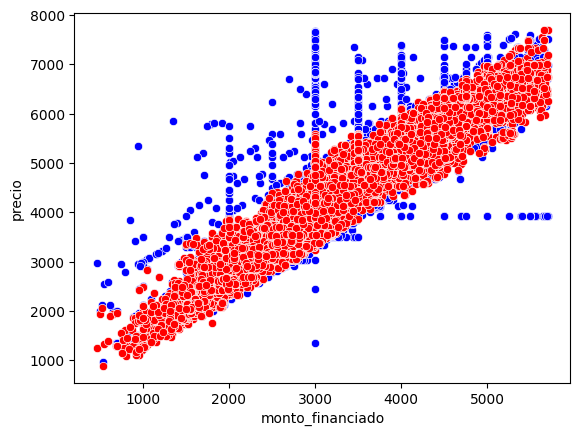

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='monto_financiado', y='precio', color="blue", data=df)
sns.scatterplot(x='monto_financiado', y='Predicciones', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.886387370932019

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Predicciones         22735 non-null  float64
 1   Unnamed: 0           22735 non-null  int64  
 2   plazo                22735 non-null  int64  
 3   precio               22735 non-null  float64
 4   enganche             22735 non-null  float64
 5   descuento            22735 non-null  float64
 6   semana               22735 non-null  float64
 7   monto_financiado     22735 non-null  float64
 8   costo_total          22735 non-null  float64
 9   monto_accesorios     22735 non-null  float64
 10  status               22735 non-null  float64
 11  fraude               22735 non-null  float64
 12  inversion            22735 non-null  float64
 13  pagos_realizados     22735 non-null  float64
 14  reautorizacion       22735 non-null  float64
 15  puntos               22735 non-null 

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.9414814766802473

In [ ]:
#Eliminamos la columna tipo string
num_df = df[[ 'precio', 'enganche',  'semana', 'monto_financiado', 'costo_total', 'pagos_realizados',]]

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


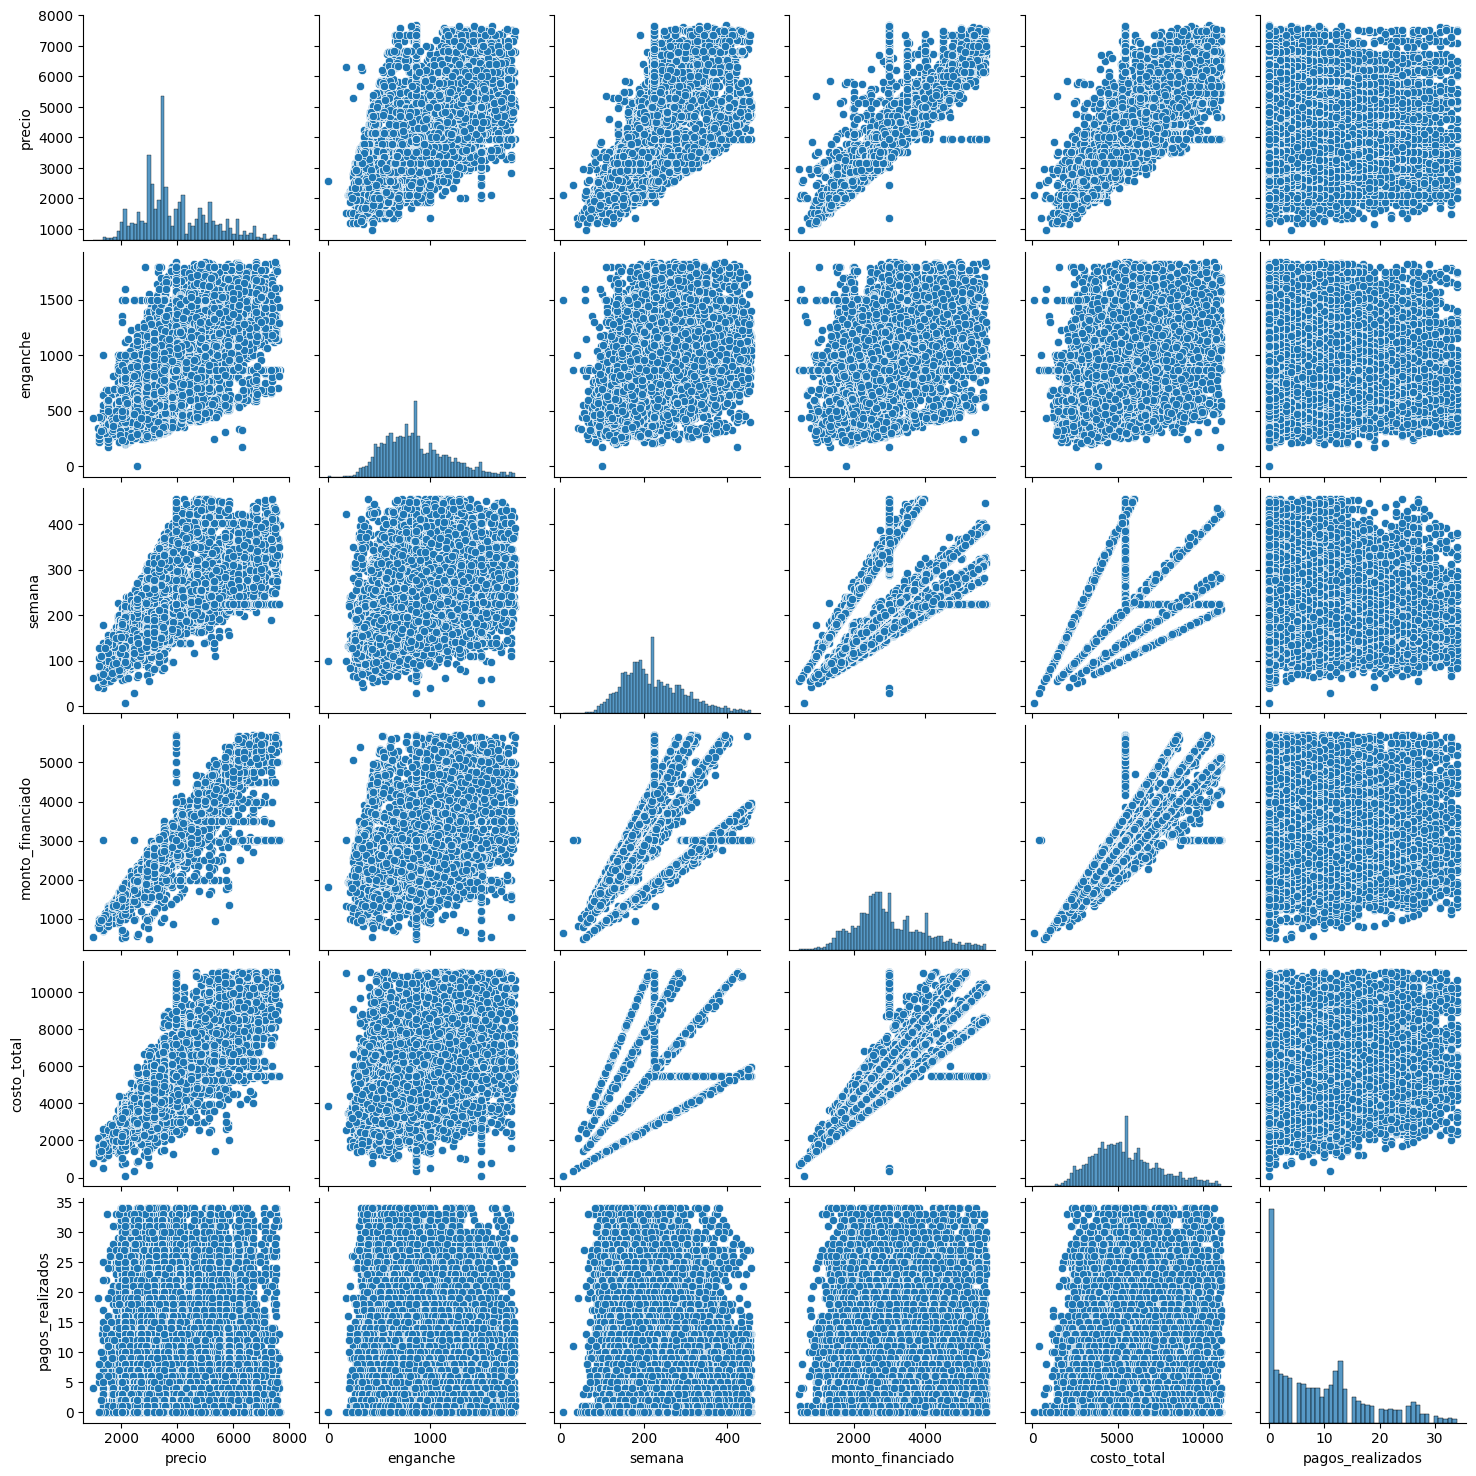

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(num_df)

In [ ]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors=num_df.corr()
Corr_Factors

,precio,enganche,semana,monto_financiado,costo_total,pagos_realizados
precio,1.000000,0.663595,0.573740,0.908594,0.797407,0.007190
enganche,0.663595,1.000000,0.344543,0.509798,0.458437,-0.092871
semana,0.573740,0.344543,1.000000,0.560739,0.322446,-0.089827
monto_financiado,0.908594,0.509798,0.560739,1.000000,0.853044,0.042108
costo_total,0.797407,0.458437,0.322446,0.853044,1.000000,0.093833
pagos_realizados,0.007190,-0.092871,-0.089827,0.042108,0.093833,1.000000


In [ ]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,precio,enganche,semana,monto_financiado,costo_total,pagos_realizados
precio,1.000000,0.663595,0.573740,0.908594,0.797407,0.007190
enganche,0.663595,1.000000,0.344543,0.509798,0.458437,0.092871
semana,0.573740,0.344543,1.000000,0.560739,0.322446,0.089827
monto_financiado,0.908594,0.509798,0.560739,1.000000,0.853044,0.042108
costo_total,0.797407,0.458437,0.322446,0.853044,1.000000,0.093833
pagos_realizados,0.007190,0.092871,0.089827,0.042108,0.093833,1.000000


<Axes: >

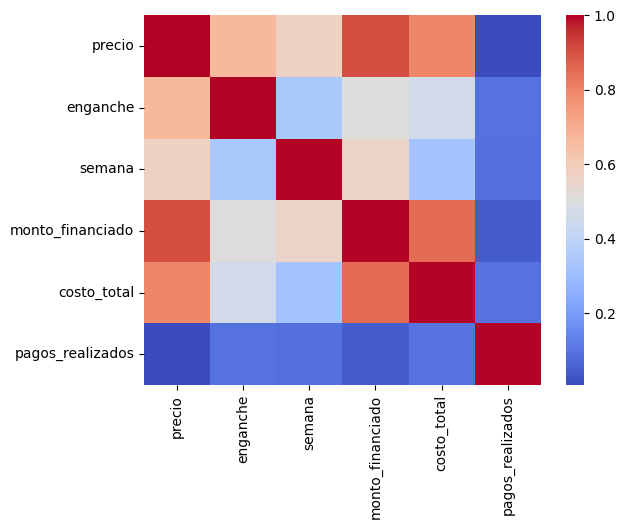

In [ ]:
#Graficamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm')  
Heat_Map

<Axes: >

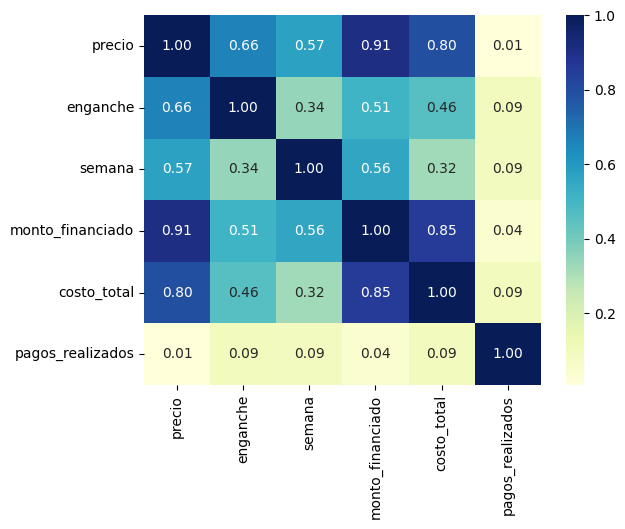

In [ ]:
#Ajustamos el mapa de calor de los coeficientes de correlación  
#El precio es la variable comparativa
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map